# Proyecto Marketing Con A/B Test


## Introduccion

En el entorno altamente competitivo del comercio electrónico, identificar estrategias efectivas para aumentar los ingresos es esencial. Como analista de una gran tienda online, se ha trabajado en colaboración con el departamento de marketing para desarrollar una serie de hipótesis orientadas a mejorar el desempeño del negocio. Estas hipótesis abordan diferentes aspectos del embudo de conversión, la experiencia del usuario y el comportamiento de compra.

Para tomar decisiones fundamentadas, es necesario evaluar y priorizar estas hipótesis en función de su impacto potencial, facilidad de implementación y confianza en su éxito. Posteriormente, se llevará a cabo un experimento controlado A/B para validar la efectividad de una de las hipótesis seleccionadas, utilizando datos reales de comportamiento de los usuarios.

## Objetivo General

Priorizar estratégicamente un conjunto de hipótesis de marketing mediante marcos analíticos y ejecutar un experimento A/B controlado con el fin de identificar cambios que generen un incremento significativo en los ingresos de la tienda online.

## Descripcion de los Datos 
``/datasets/hypotheses_us.csv``:

- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

``/datasets/orders_us.csv``:

- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.

``/datasets/visits_us.csv``:

- date: la fecha.
- group: grupo de la prueba A/B.
- visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

In [548]:
# Cargar todas las librerias
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [549]:
# Designar las variables de los Dataframe 

hypotheses=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto spring 10/hypotheses_us.csv', sep=';')
orders=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto spring 10/orders_us_export.csv', sep=',')
visits=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto spring 10/visits_us_export.csv', sep=',')


## Nombres asignados a los DataFrames

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas a los servidores. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `hypotheses`: corresponde al resultado de la consulta ``hypotheses_us``.
- `orders`: corresponde al resultado de la consulta `orders_us_export`.
- `visits`: corresponde al resultado de la consulta `visits_us_export`.

A continuación, el análisis exploratorio de los datos.

In [550]:
# Visualizacion preliminar de los dataframes:

hypotheses.info()
print(hypotheses)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3 

In [551]:
# Visualizacion preliminar de los dataframes:

orders.info()
print( orders.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
      transactionId   visitorId        date  revenue group
73       1295850747  2947100995  2019-08-01    455.8     A
877      1319904784  1274716998  2019-08-08     25.4     B
787      1348929396  2698944478  2019-08-07     15.8     A
696       198999602  3659263677  2019-08-09     40.8     A
1008     2316868256  2600415354  2019-08-31     45.9     A


In [552]:
# Visualizacion preliminar de los dataframes:

visits.info()
print(visits.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
          date group  visits
10  2019-08-11     A     718
13  2019-08-14     A     735
44  2019-08-14     B     746
2   2019-08-03     A     507
39  2019-08-09     B     610


## Correcion de tipo de datos
Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo cual permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las transformaciones realizadas específicamente en los dataframes

- En ``hypotheses``, se renombran las columnas para estandariar los datos,eliminar espacios y facilitar el manejo del código .

- En ``orders``, se transforma la columna date al tipo de dato para el analisis y se asegura que los nombres de las columnas esten estandarizados.

- En `visits`, se transforma la columna date al tipo de dato para el analisis y se asegura que los nombres de las columnas esten estandarizados.

Esta preparación garantiza que los datos estén listos para los análisis de comportamiento, cohortes y rentabilidad que se desarrollarán a lo largo del proyecto.

In [553]:
# Renombrar columnas para que sean más fáciles de manejar


hypotheses.columns=['hypothesis','reach','impact','confidence','effort']
orders.columns = ['transaction_id', 'visitor_id','date','revenue','group']


# Revisar los tipos
print(hypotheses.dtypes)
print(orders.dtypes)
print(visits.dtypes)

hypothesis    object
reach          int64
impact         int64
confidence     int64
effort         int64
dtype: object
transaction_id      int64
visitor_id          int64
date               object
revenue           float64
group              object
dtype: object
date      object
group     object
visits     int64
dtype: object


# Priorizar hipótesis

Se aplicaran framesworks como lo son ``ICE`` y ``RICE`` de acuerdo a esto se ordenaran las hipotesis por orden de prioridad y a su ves se buscar dar una explicacion de los cambios que intervienen una de la otra 

In [554]:
# Calculo de la variable ICE

hypotheses['ICE']=(hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

print(hypotheses[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [555]:
# Calculo de la variable RICE 

hypotheses['RICE']=(hypotheses['reach'] * hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

print(hypotheses[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Explicacion de cambio



``Hipótesis 7 Formulario de suscripción``: sube al puesto 1 con RICE, probablemente porque afecta a todos los visitantes del sitio (alto reach),
tiene impacto moderado y buena confianza y requiere poco esfuerzo.
ICE = 11.2 → RICE = 112.0

- Sube del puesto 3 al 1

Motivo: Aunque el impacto no es tan alto, el Reach es enorme: está en todas las páginas principales, lo ve casi todo el tráfico.

Además, probablemente tiene bajo esfuerzo de implementación.
- El multiplicador de Reach hace que suba muchísimo.


``Hipótesis 2 Recomendaciones de productos``: también mejora en RICE: su impacto es alto y afecta a muchos.

En cambio, cambios cosméticos como el color de fondo (#4) quedan últimos en ambos rankings, porque tienen bajo impacto y alcance.
ICE = 7.0 → RICE = 56.0

- Sube del puesto 5 al 2

Motivo: Tiene impacto moderado pero muy buen alcance (muchos usuarios ven productos) y una buena relación esfuerzo/beneficio.
- El Reach refuerza su valor real frente a su puntuación ICE más discreta.


``Hipótesis 0 Nuevos canales de tráfico``: Alcance inicial bajo (canales nuevos aún sin tráfico)
ICE = 13.33 → RICE = 40.0

- Baja del puesto 2 al 3

Motivo: Aunque su impacto es alto, su Reach inicial podría ser bajo (los nuevos canales aún no existen, así que pocos usuarios los usan al comienzo).

- En ICE brilla por su potencial, pero en RICE se ajusta por su alcance real actual.

``Hipótesis 6 Banners de ofertas``: Buen alcance en homepage, fácil de implementar
ICE = 8.0 → RICE = 40.0

- Sube ligeramente (del puesto 4 a compartir el 3º con la anterior)

Motivo: Aunque su impacto no es enorme, está en el home (mucho alcance), y su esfuerzo es probablemente bajo.
- Reach + facilidad de implementación lo hace más atractivo en RICE.

``Hipótesis 8 Descuento para nuevos usuarios``: 
tenía el mayor ICE, pero baja en RICE porque probablemente su alcance (reach) es bajo, solo afecta a nuevos usuarios.
ICE = 16.2 → RICE = 16.2

- Baja del puesto 1 al 5

Motivo: ICE lo prioriza por su alto impacto y facilidad, pero afecta solo a nuevos usuarios, por eso el Reach es muy limitado.
- RICE penaliza su bajo alcance aunque sea efectiva.

## Análisis del test A/B

- Tras la ejecución del test A/B, se obtienen una serie de datos que servirán como base para el análisis. El objetivo es extraer conclusiones objetivas y fundamentadas, respaldadas por evidencia empírica, que permitan orientar con rigor las decisiones y estrategias a implementar.


###  Ingreso Acumulado por Grupo

In [556]:
# separacion de los grupos:

group_A= orders[orders['group']=='A'].drop_duplicates()

group_B= orders[orders['group']=='B'].drop_duplicates()

print(group_A)
print(group_B)

      transaction_id  visitor_id        date  revenue group
2         2961555356  4069496402  2019-08-15     10.2     A
7         2626614568    78758296  2019-08-15     20.1     A
8         1576988021   295230930  2019-08-15    215.9     A
10        3649131742   879864040  2019-08-15     65.7     A
12        2809384911  3213223594  2019-08-15    115.4     A
...              ...         ...         ...      ...   ...
1187      2274188238   132143192  2019-08-14     15.5     A
1188      1692103379  1022829655  2019-08-14      5.7     A
1193      2203539145   370388673  2019-08-14     50.1     A
1194      1807773912   573423106  2019-08-14    165.3     A
1195      1947021204  1614305549  2019-08-14      5.5     A

[557 rows x 5 columns]
      transaction_id  visitor_id        date  revenue group
0         3667963787  3312258926  2019-08-15     30.4     B
1         2804400009  3642806036  2019-08-15     15.2     B
3         3797467345  1196621759  2019-08-15    155.1     B
4         228298

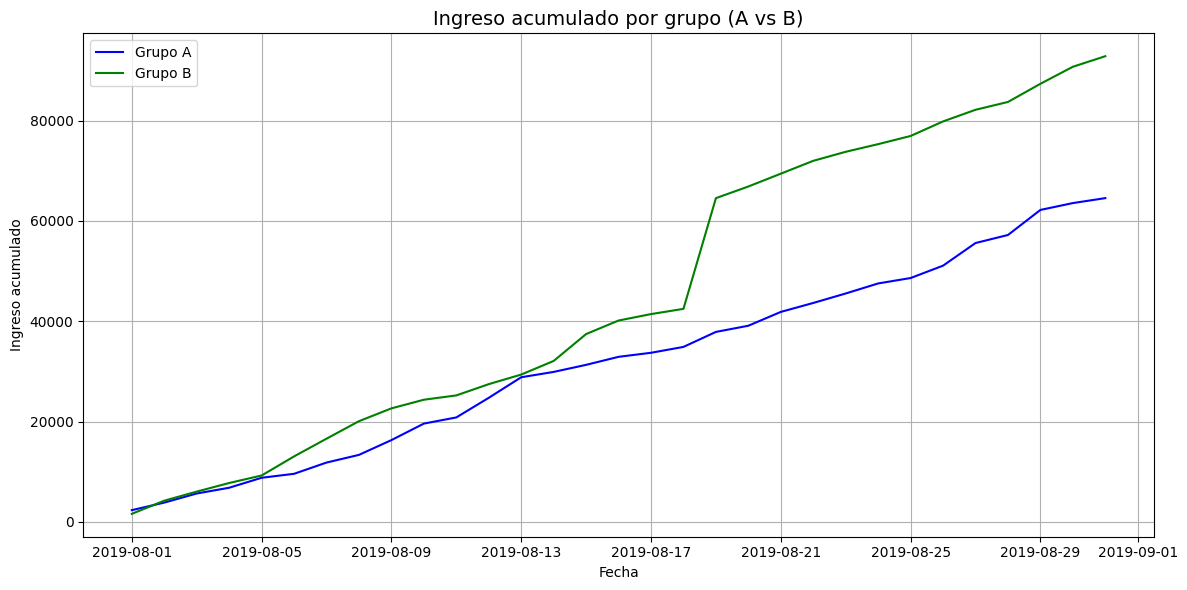

In [557]:
# Acumulado diario 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

datesGroups=orders[['date','group']].drop_duplicates()

ordersAggregated=datesGroups.apply(lambda x: orders [np.logical_and(orders['date']<= x['date'],orders['group']==x['group'])].agg({'date':'max','group':'max','transaction_id':pd.Series.nunique,'visitor_id': pd.Series.nunique,'revenue':'sum'}),axis=1).sort_values(by=['date','group'])


visitorsAggregated=datesGroups.apply(lambda x: visits [np.logical_and(visits['date']<= x['date'],visits['group']==x['group'])].agg({'date':'max','group':'max','visits':'sum'}),axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns=['date','group','orders','buyers','revenue','visitors']

# Ingresos acumulados por grupo 

cumulativeRevenueA=cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

cumulativeRevenueB=cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]


# Grafico comparativo

plt.figure(figsize=(12, 6))

# Línea grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A', color='blue')

# Línea grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B', color='green')


plt.title('Ingreso acumulado por grupo (A vs B)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones preminilares

- De acuerdo con el comportamiento del ingreso acumulado mostrado en la gráfica, se observa que durante aproximadamente los primeros 15 días del experimento A/B, ambos grupos presentan una tendencia de crecimiento similar. Sin embargo, a partir del día 17, el grupo B comienza a destacarse con un crecimiento más acelerado en comparación con el grupo A. A partir del día 19, aunque ambos grupos mantienen una trayectoria ascendente, la diferencia entre ellos se estabiliza, conservando el grupo B una ventaja sostenida en términos de ingresos acumulados.

### Tamaño de Pedido Promedio Acumulado por Grupo

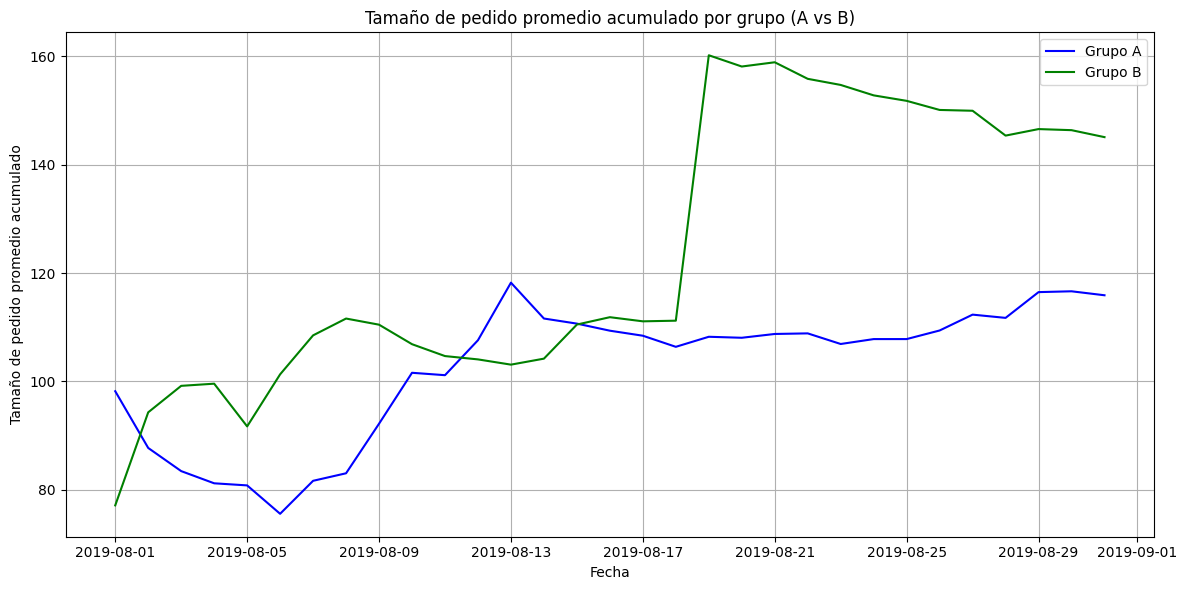

In [558]:
# Calculo de Promedio de pedido


plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Grupo A', color='blue')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Grupo B', color='green')

plt.title('Tamaño de pedido promedio acumulado por grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones preminilares

- Durante los primeros 17 días, el comportamiento del tamaño promedio acumulado de pedido entre ambos grupos es relativamente similar, con algunas fluctuaciones, pero sin una ventaja clara y sostenida de un grupo sobre otro.

- A partir del día 18, el Grupo B experimenta un aumento pronunciado y consistente en el tamaño de pedido promedio acumulado. Esta diferencia se mantiene durante el resto del experimento, aunque con una ligera tendencia descendente en los últimos días.

- En contraste, el Grupo A muestra un comportamiento más estable y moderado, sin grandes saltos ni caídas bruscas, pero también sin lograr alcanzar el mismo nivel que el Grupo B.

Esto sugiere que la modificación aplicada al Grupo B podría haber influido positivamente en el valor promedio de los pedidos, incrementándolo de manera considerable tras cierto punto (día 18). Este cambio podría deberse a una acción puntual  o al impacto acumulado de la intervención

## Diferencia Relativa en el Tamaño de Pedido Promedio

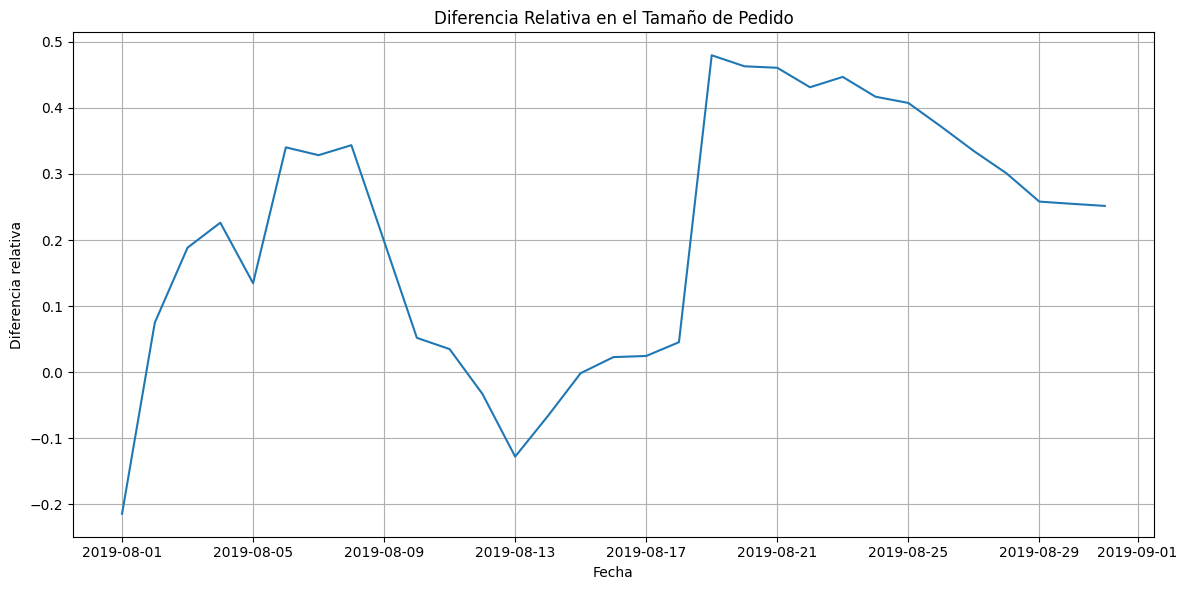

In [559]:
# Unimos los dataframes

mergedCumulativeRevenue=cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date',right_on='date',how='left',suffixes=['A','B'])

# COnstruccion del grafico
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Diferencia Relativa en el Tamaño de Pedido')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')

plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones preminilares

- Al inicio del experimento (1 de agosto), el grupo B tenía un tamaño de pedido promedio inferior al grupo A, con una diferencia relativa de aproximadamente -20% pero con un repunte para los dias siguientes.

- Entre el 7 y el 17 de agosto, la diferencia se reduce considerablemente, incluso con algunos días en los que el grupo B vuelve a estar por debajo del grupo A.

- A partir del 18 de agosto, se observa un cambio notable: la diferencia relativa se dispara rápidamente hasta llegar a cerca del +48% alrededor del 20 de agosto. Esto indica que Grupo B empieza a superar consistentemente al Grupo A en tamaño de pedido promedio.

- Durante el resto del periodo (hasta el 31 de agosto), la diferencia se mantiene positiva, aunque con una leve tendencia a la baja, terminando alrededor de un +25%.


La diferencia positiva sostenida en la segunda mitad del mes sugiere que el experimento aplicado al grupo B podría estar teniendo un efecto positivo.

Sin embargo, la variabilidad al inicio y la ligera caída al final indican que es importante:
- Evaluar si la diferencia es estadísticamente significativa.
- Asegurarse de que no haya factores externos afectando los datos

## Tasa de Conversión de Cada Grupo Como la Relación Entre los Pedidos

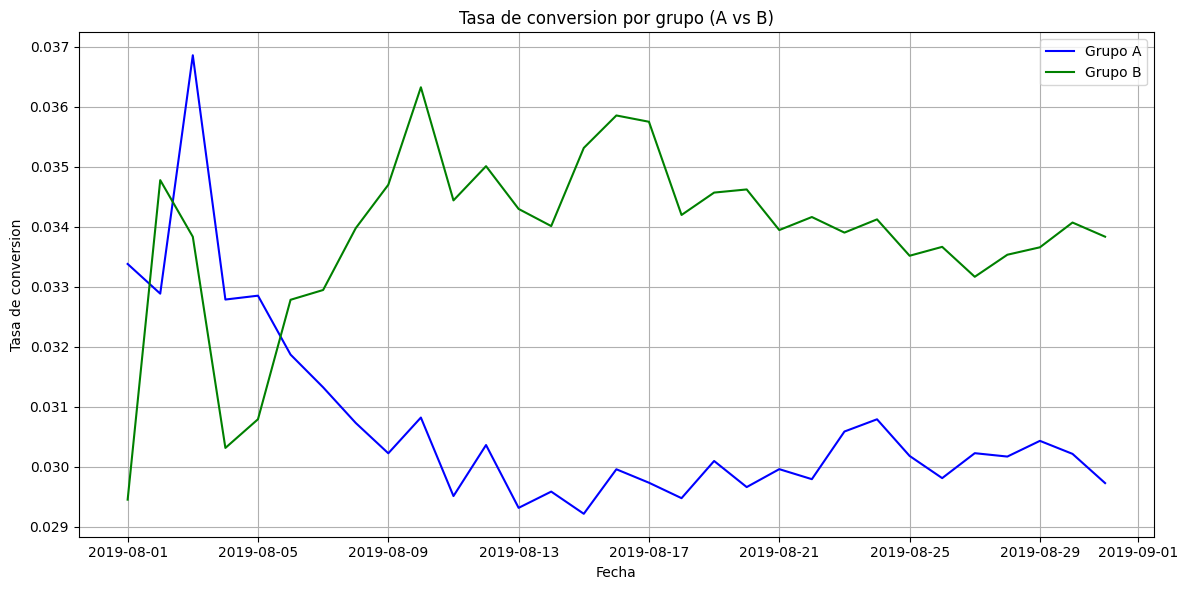

In [560]:
# Calculo de la tasa de conversion por grupo

cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA=cumulativeData[cumulativeData['group']=='A']
cumulativeDataB=cumulativeData[cumulativeData['group']=='B']
# Creacion del Grafico

plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'],label='Grupo A', color='blue')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'],label='Grupo B', color='green')
plt.title('Tasa de conversion por grupo (A vs B)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Conclusión preliminar


- El grupo A comienza con una ligera ventaja, alcanzando un pico máximo cerca del 3.7% el 4 de agosto.

- Grupo B es más variable, con un crecimiento rápido el 2 de agosto, pero una caída brusca al día siguiente.

- A partir de el dia 5 , la tasa de conversión del grupo B supera consistentemente a la del grupo A.

- Grupo A muestra una tendencia descendente, estabilizándose entre el 2.9% y 3.1%.

- El grupo B mantiene una ventaja constante, con tasas de conversión entre 3.3% y 3.6%.

La brecha entre ambos grupos es sostenida y clara, con una diferencia que ronda entre 0.3 y 0.5 puntos porcentuales.

``Grupo B`` muestra una mejora consistente en la tasa de conversión en comparación con el ``grupo A``, especialmente a partir de la segunda semana del experimento.

Esta diferencia se mantiene de forma estable en el tiempo, lo cual es un buen indicador de que el cambio introducido en el grupo B está funcionando.

La consistencia y magnitud de la diferencia sugiere que el experimento podría estar teniendo un impacto positivo real, más allá de la variabilidad diaria.

## Dispersión del Número de Pedidos por Usuario

      visitor_id  transactions
1023  4256040402            11
591   2458001652            11
569   2378935119             9
487   2038680547             8
44     199603092             5
299   1230306981             5
55     237748145             5
744   3062433592             5
897   3717692402             5
917   3803269165             5


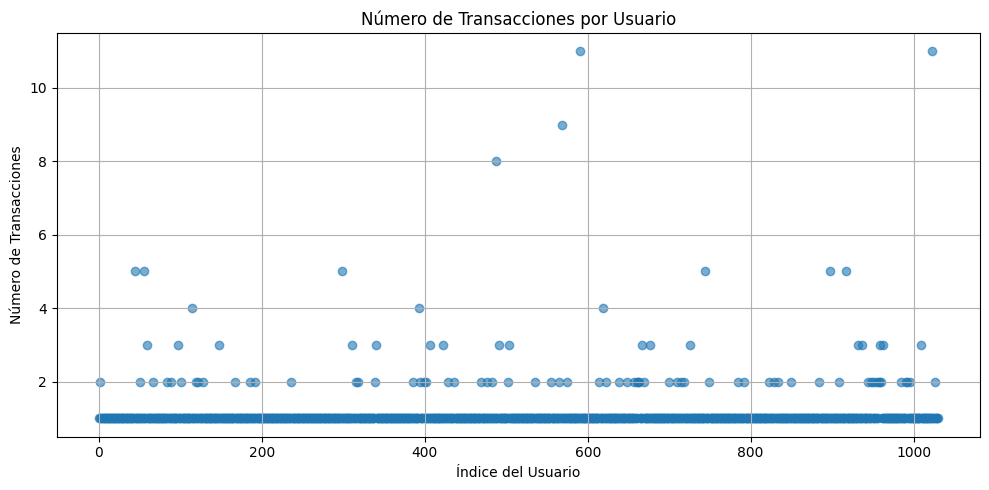

In [ ]:
ordersByUsers = ( orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsers.columns = ['visitor_id', 'transactions']

print(ordersByUsers.sort_values(by='transactions', ascending=False).head(10))


# Rango del grafico 
x_values = pd.Series(range(len(ordersByUsers)))

plt.figure(figsize=(10, 5))  
plt.scatter(x_values, ordersByUsers['transactions'], alpha=0.6)

plt.title('Número de Transacciones por Usuario')
plt.xlabel('Índice del Usuario')
plt.ylabel('Número de Transacciones')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones Preliminares

Como era de esperarse, el gráfico muestra que la mayoría de los usuarios realizaron solo una o dos transacciones. Sin embargo, se observa un pequeño grupo de usuarios que realizaron un número significativamente mayor de pedidos (más de 5 e incluso hasta 11). Estos casos pueden considerarse valores atípicos y no representan una proporción significativa dentro del conjunto total de usuarios. Por tanto, su impacto en el comportamiento general es limitado y deben ser tratados con precaución en el análisis
